In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

import cv2
from scipy.signal import convolve2d
from scipy.signal import find_peaks

from utils import *
    
resdir = 'res'

In [2]:
mpl.rcParams['figure.figsize'] = (20, 20)
TASK = 2
if not os.path.exists('{}/{}'.format(resdir, task_dirtree[TASK][0])):
    os.makedirs('{}/{}'.format(resdir, task_dirtree[TASK][0]))

In [3]:
from numpy.linalg import norm

def distance(a, b):
    print(norm(a - b))
    return norm(a - b)

def distances(vectors):
    D = []
#     for pair in combinations(vectors, 2):
#         D.append(distance(*pair))
    for pair in [(vectors[0], v) for v in vectors[1:]]:
#         print(pair)
        D.append(distance(*pair))
    return D

In [6]:
from skimage.feature import peak_local_max

# imshow(th)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel, iterations=1)

# sure background area
sure_fg = cv2.dilate(opening, kernel, iterations=1)
noise = np.zeros_like(sure_fg, dtype=np.uint8)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 3)
imshow(dist_transform)
# noise = cv2.threshold(dist_transform, 0.2*dist_transform.max(),255,0)[1].astype(np.uint8)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)
sure_fg = cv2.subtract(sure_fg, noise)
imshow(sure_fg, sub=(1,3,1))
sure_bg = cv2.dilate(opening, kernel, iterations=1)
imshow(sure_bg, sub=(1,3,2))
unknown = cv2.subtract(sure_bg, sure_fg)
imshow(unknown, sub=(1,3,3))
plt.show()

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
imshow(markers, sub=(1,3,1))

markers = cv2.watershed(image, markers)
imshow(markers, sub=(1,3,2))
plt.show()

NameError: name 'th' is not defined

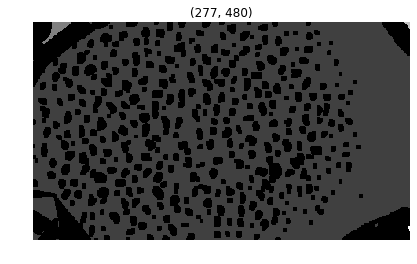

In [104]:
imshow(markers)

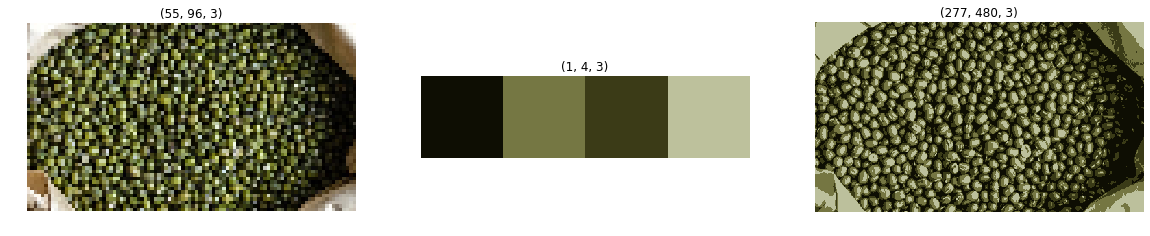

159.7908423054659
66.20579771668247
293.0035456321774


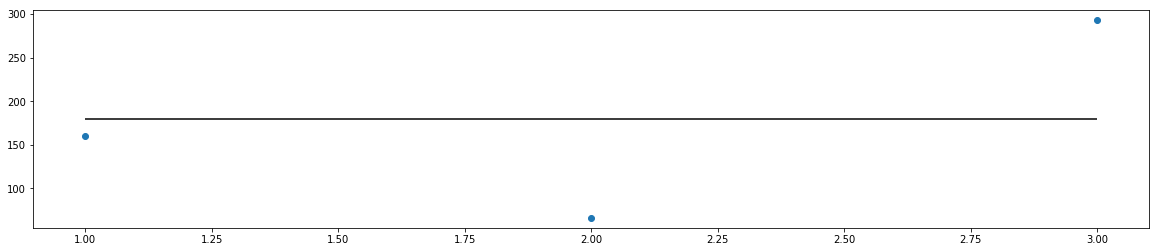

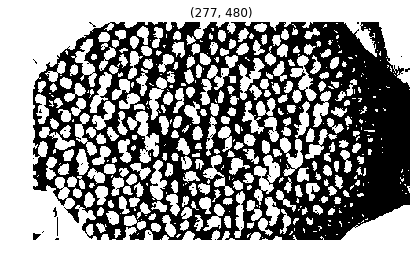

In [5]:
mpl.rcParams['figure.figsize'] = (20, 4)
for example_id in range(1,13):
    image, _ = get_example(example_id, TASK, brightness_value=0, show=False)
    image_resized = cv2.resize(image, None, fx=0.2, fy=0.2)
    imshow(image_resized, sub=(1,3,1))
    
    # EM
    # Get dominant colors
    N_CLUSTERS = 4
    em = cv2.ml.EM_create()
    em.setClustersNumber(N_CLUSTERS)
    em.trainEM(image_resized.reshape((-1,3)))
    means = em.getMeans()
    covs = [np.diag(c) for c in em.getCovs()]
    means_img = np.round(means).astype(np.uint8).reshape(1,N_CLUSTERS,3)
    imshow(means_img, sub=(1,3,2))
    _, prob = em.predict(np.ﬂoat32(image.reshape((-1,3))))
    image_segmented = means[np.argmax(prob, 1)].reshape(image.shape).astype(np.uint8)
    imshow(image_segmented, sub=(1,3,3))
    plt.show()
    D = distances(means)
    plt.scatter(np.arange(1,N_CLUSTERS), D)
    plt.hlines(np.min(D) + 0.5 * (np.max(D) - np.min(D)), 1, N_CLUSTERS-1)
    plt.show()
    
    # Segment
    imshow(cv2.threshold(cv2.cvtColor(image_segmented, cv2.COLOR_RGB2GRAY),
                         255, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1])

    
    # Canny
#     edges = cv2.Canny(image, 100, 300, apertureSize=3, L2gradient=True)
#     imshow(fillHoles(dilate(edges, kernel=1)))

    # Hist
#     for i in range(3):
#         y, x = np.histogram(image[:,:,i], bins=51)
#         plt.subplot(1,3,i+1)
#         plt.bar(x[:-1], y)
#     plt.show()
    
    # Threshold
#     threshold = np.ones_like(image.mean(2))
#     print(threshold.shape)
#     for i in range(3):
# #         th = cv2.adaptiveThreshold(image[:,:,i], 255,
# #                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
# #                                   cv2.THRESH_BINARY, 51, 3)
#         _, th = cv2.threshold(image[:,:,i], 255, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#         th = fillHoles(th, 2)
#         imshow(th, sub=(1,3,i+1))
#         print(th.shape)
#         threshold *= th.astype(bool)
#     imshow(threshold)
    break

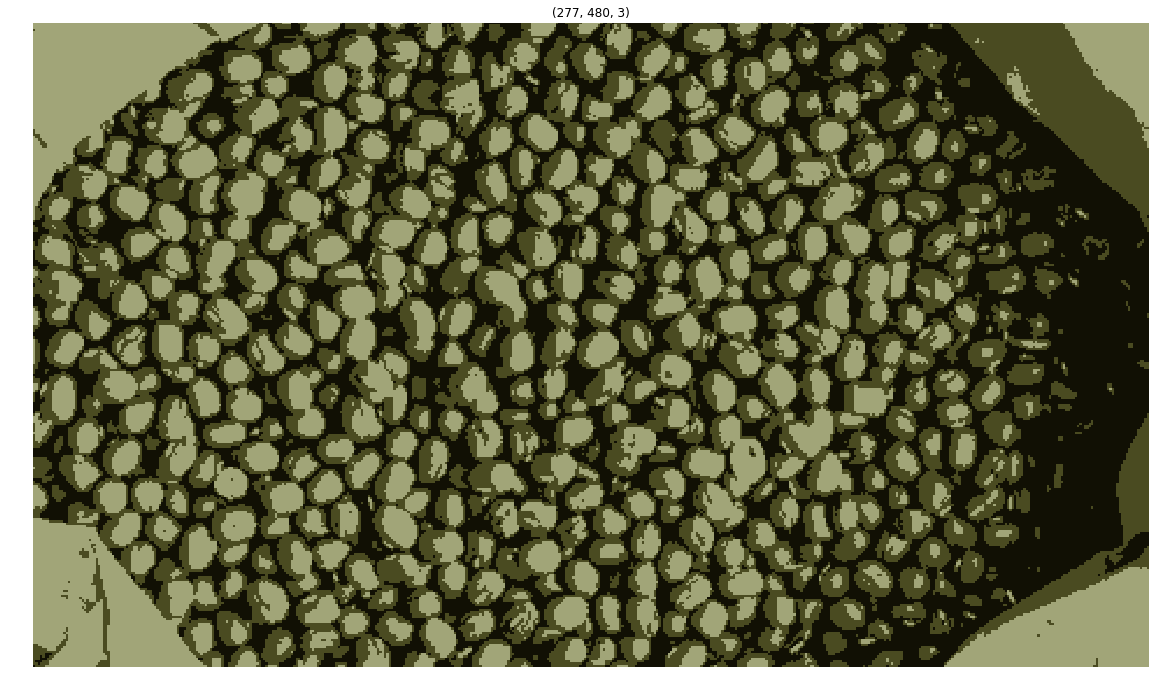

In [39]:
# prob.reshape((*image.shape[:2],2))
data_new = means[np.argmax(prob, 1)]
image_segmented = data_new.reshape(image.shape).astype(np.uint8)
imshow(image_segmented)

array([1, 1, 1, ..., 1, 1, 1])